## Simple Beginner kernel using logistic regression

In [879]:
import pandas as pd 
import numpy as np

In [880]:
train=pd.read_csv("C:/Users/Dragneel/Desktop/jupyter/training data/Titanic survival/train.csv")
test=pd.read_csv("C:/Users/Dragneel/Desktop/jupyter/testing data/Titanic survival/test.csv")

In [881]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [882]:
train.drop(['Name'],axis=1,inplace=True)

In [883]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [884]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [885]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [886]:
sample_sub=pd.read_csv("C:/Users/Dragneel/Desktop/jupyter/sample submissions/Titanic survival/gender_submission.csv")

In [887]:
sample_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [888]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [889]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [890]:
test.drop(['Name'],axis=1,inplace=True)

In [891]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [892]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [893]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [894]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [895]:
train.drop(['Cabin'],axis=1,inplace=True)

In [896]:
test.drop(['Cabin'],axis=1,inplace=True)

In [897]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,62.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,1,3101298,12.2875,S


In [898]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [899]:
test.drop(['Ticket'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)

In [900]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [901]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Visualization

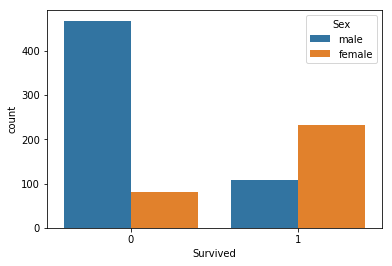

In [902]:
import seaborn as sns
sns.countplot(x='Survived',hue='Sex',data=train)

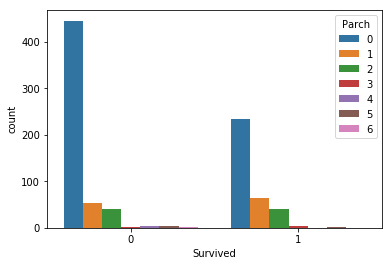

In [903]:
sns.countplot(x='Survived',hue='Parch',data=train)

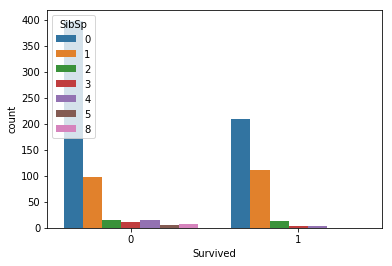

In [904]:
sns.countplot(x='Survived',hue='SibSp',data=train)

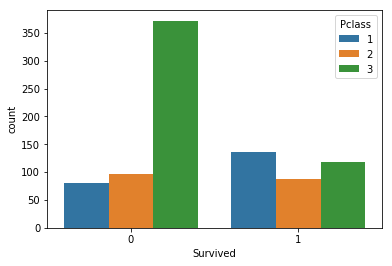

In [905]:
sns.countplot(x='Survived',hue='Pclass',data=train)

### transformation

In [906]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [907]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [908]:
train.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [909]:
test.isnull()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [910]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [911]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [912]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [913]:
train['Age'].mean()

29.69911764705882

In [914]:
train['Age'].fillna((train['Age'].mean()), inplace=True)

In [915]:
test['Age'].fillna((test['Age'].mean()), inplace=True)

In [916]:
test['Fare'].fillna((test['Fare'].mean()), inplace=True)

In [917]:
train.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


In [918]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [919]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [920]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [921]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [922]:
Pclass=pd.get_dummies(train['Pclass'],drop_first=True)
Pclass1=pd.get_dummies(test['Pclass'],drop_first=True)

In [923]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)
Sex1=pd.get_dummies(test['Sex'],drop_first=True)

In [924]:
Embarked=pd.get_dummies(train['Embarked'],drop_first=True)
Embarked1=pd.get_dummies(test['Embarked'],drop_first=True)

In [925]:
train=pd.concat([train,Pclass,Sex,Embarked],axis=1)

In [926]:
test=pd.concat([test,Pclass1,Sex1,Embarked1],axis=1)

In [927]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,1,0,1


In [928]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,0,1,1,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,1,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,0,1,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,1,1,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,1,0,0,1


In [929]:
train.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)

In [930]:
test.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)

In [931]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,1,0,22.0,1,0,7.2500,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,1,1,0,1


In [932]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,892,34.5,0,0,7.8292,0,1,1,1,0
1,893,47.0,1,0,7.0000,0,1,0,0,1
2,894,62.0,0,0,9.6875,1,0,1,1,0
3,895,27.0,0,0,8.6625,0,1,1,0,1
4,896,22.0,1,1,12.2875,0,1,0,0,1


In [933]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [934]:
test.drop(['PassengerId'],axis=1,inplace=True)

In [935]:
train.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [936]:
test.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [937]:
sample_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Modelling

In [938]:
from sklearn.model_selection import train_test_split

In [939]:
y=train['Survived']

In [940]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [941]:
X=train.drop('Survived',axis=1)

In [942]:
X.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


In [943]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [944]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [945]:
predictions = logmodel.predict(X_test)

In [946]:
from sklearn.metrics import classification_report

In [947]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.78      0.91      0.84       160\n           1       0.82      0.62      0.71       108\n\n   micro avg       0.79      0.79      0.79       268\n   macro avg       0.80      0.76      0.77       268\nweighted avg       0.79      0.79      0.78       268\n'

In [948]:
from sklearn.metrics import confusion_matrix

In [949]:
confusion_matrix(y_test,predictions)

array([[145,  15],
       [ 41,  67]], dtype=int64)

In [950]:
(145+67)/(41+67+15+145)

0.7910447761194029

approx 79% accuracy

## Predicting 

In [951]:
test.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [952]:
test.isnull().sum()

Age      0
SibSp    0
Parch    0
Fare     0
2        0
3        0
male     0
Q        0
S        0
dtype: int64

In [953]:
predictions1 = logmodel.predict(test)

In [954]:
sample_sub['Survived']= predictions1

In [955]:
sample_sub.to_csv("C:/Users/Dragneel/Desktop/jupyter/submit.csv", index=False)

In [956]:
sample_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Please upvote if you liked this XD